In [6]:
import pandas as pd
import numpy as np
import os
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import cdist
import cartopy.crs as ccrs
import cartopy.feature as cf
from functions.fun_sdk import *

os.environ['TZ'] = 'UTC'

In [73]:
# Get NWP model data for the tracks
# Complete time scale
# Vertical Parameters
nwp = 'ERA5T'
sed = ['2021-06-01','2021-06-02','2021-06-04','2021-06-05','2021-06-08','2021-06-18','2021-06-21','2021-06-22','2021-07-13','2021-07-25','2021-07-26']

cellsmeteo = pd.DataFrame() # Dataframe for meteo of single cell

for i in np.arange(0,len(sed),1):
    doi = sed[i]
    y_oi = doi.split('-')[0]
    m_oi = doi.split('-')[1]
    d_oi = doi.split('-')[2]

    fs = glob.glob("/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tracks/data/"+y_oi+"/"+m_oi+"/"+d_oi+"/Track_*")

    for j in np.arange(0,len(fs),1):
        cdata = pd.read_csv(fs[j])
        meteo = pd.DataFrame()
        for k in np.arange(0,len(cdata),1):
            start = cdata.timestr[k].split()[0]
            end = cdata.timestr[k].split()[0]

            time = pd.Timestamp(cdata.timestr[k]).round('1 H')

            cois = [[cdata.longitude[k],cdata.latitude[k]]]

            nwpdata = get_sounding_model_output(cois, start, end, nwp, apikey='nRMiXJ34HBIwOjlq')

            nwpdata = nwpdata[nwpdata.TIMESTAMP == time]

            X = np.array([1000,900,850,800,700,500,250]).reshape(-1,1)
            y = np.array(nwpdata.iloc[:,4:11])[0]

            reg = LinearRegression().fit(X, y)
            tgrad = pd.DataFrame({'tgrad':-reg.coef_})

            X = np.array([1000,900,850,800,700,500,250]).reshape(-1,1)
            y = np.array(nwpdata.iloc[:,12:19])[0]

            reg = LinearRegression().fit(X, y)
            wsshear = pd.DataFrame({'wsshear':-reg.coef_})

            X = np.array([1000,900,850,800,700,500,250]).reshape(-1,1)
            y = np.array(nwpdata.iloc[:,20:27])[0]

            reg = LinearRegression().fit(X, y)
            wdshear = pd.DataFrame({'wdshear':-reg.coef_})

            meteorow = pd.concat([tgrad, wsshear, wdshear], axis = 1)

            meteo = pd.concat([meteo, meteorow],axis = 0)
            meteo = meteo.reset_index(drop = True)
        meteo = pd.concat([cdata[['timestr','cell']],meteo], axis = 1)
        cellsmeteo = pd.concat([cellsmeteo,meteo],axis=0)

# save to csv
# cellsmeteo.to_csv("/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tobac_tracking_statistics/tracks/data/track_statistic_vertical.csv", index = False)

In [2]:
# cellsmeteo = pd.read_csv("/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tobac_tracking_statistics/tracks/data/track_statistic_vertical.csv")

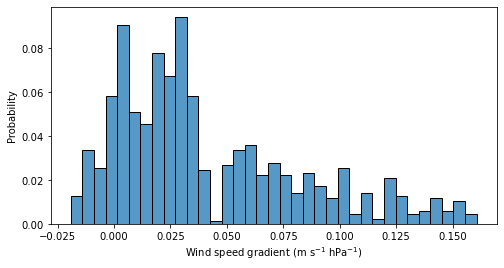

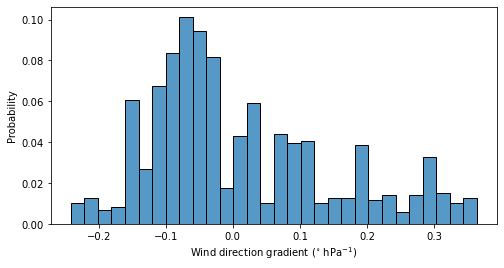

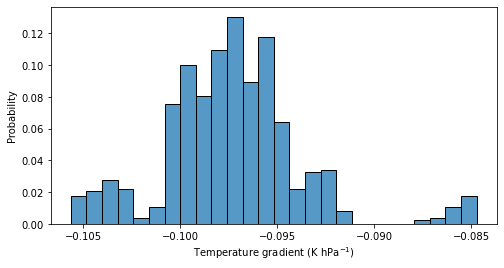

In [18]:
# WIND SPEED SHEAR
plt.figure(figsize=(8,4))
seaborn.histplot(cellsmeteo.wsshear,kde = False, bins = int(((cellsmeteo.wsshear).max()-(cellsmeteo.wsshear).min())/0.005), stat = "probability")
plt.xlabel('Wind speed gradient (m s$^{-1}$ hPa$^{-1}$)')
plt.savefig('/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tobac_tracking_statistics/tracks/vertical_tALL_wind_speed_gradient_'+nwp+'.png',dpi=400,facecolor='white',transparent=False)

# WIND DIRECTION SHEAR
plt.figure(figsize=(8,4))
seaborn.histplot(cellsmeteo.wdshear,kde = False, bins = int(((cellsmeteo.wdshear).max()-(cellsmeteo.wdshear).min())/0.02), stat = "probability")
plt.xlabel('Wind direction gradient ($^{\circ}$ hPa$^{-1}$)')
plt.savefig('/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tobac_tracking_statistics/tracks/vertical_tALL_wind_direction_gradient_'+nwp+'.png',dpi=400,facecolor='white',transparent=False)

# TEMPERATURE GRADIENT
plt.figure(figsize=(8,4))
seaborn.histplot(cellsmeteo.tgrad,kde = False, bins = int(((cellsmeteo.tgrad).max()-(cellsmeteo.tgrad).min())/0.0008), stat = "probability")
plt.xlabel('Temperature gradient (K hPa$^{-1}$)')
plt.savefig('/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tobac_tracking_statistics/tracks/vertical_tALL_temperature_gradient_'+nwp+'.png',dpi=400,facecolor='white',transparent=False)


In [90]:
# Get NWP model data for the tracks
# Initial phase
# Vertical Parameters
nwp = 'ERA5T'
sed = ['2021-06-01','2021-06-02','2021-06-04','2021-06-05','2021-06-08','2021-06-18','2021-06-21','2021-06-22','2021-07-13','2021-07-25','2021-07-26']

cellsmeteo = pd.DataFrame() # Dataframe for meteo of single cell

for i in np.arange(0,len(sed),1):
    doi = sed[i]
    y_oi = doi.split('-')[0]
    m_oi = doi.split('-')[1]
    d_oi = doi.split('-')[2]

    fs = glob.glob("/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tracks/data/"+y_oi+"/"+m_oi+"/"+d_oi+"/Track_*")

    for j in np.arange(0,len(fs),1):
        cdata = pd.read_csv(fs[j])
        meteo = pd.DataFrame()
        for k in np.arange(0,3,1):
            start = cdata.timestr[k].split()[0]
            end = cdata.timestr[k].split()[0]

            time = pd.Timestamp(cdata.timestr[k]).round('1 H')

            cois = [[cdata.longitude[k],cdata.latitude[k]]]

            nwpdata = get_sounding_model_output(cois, start, end, nwp, apikey='nRMiXJ34HBIwOjlq')

            nwpdata = nwpdata[nwpdata.TIMESTAMP == time]

            X = np.array([1000,900,850,800,700,500,250]).reshape(-1,1)
            y = np.array(nwpdata.iloc[:,4:11])[0]

            reg = LinearRegression().fit(X, y)
            tgrad = pd.DataFrame({'tgrad':-reg.coef_})

            X = np.array([1000,900,850,800,700,500,250]).reshape(-1,1)
            y = np.array(nwpdata.iloc[:,12:19])[0]

            reg = LinearRegression().fit(X, y)
            wsshear = pd.DataFrame({'wsshear':-reg.coef_})

            X = np.array([1000,900,850,800,700,500,250]).reshape(-1,1)
            y = np.array(nwpdata.iloc[:,20:27])[0]

            reg = LinearRegression().fit(X, y)
            wdshear = pd.DataFrame({'wdshear':-reg.coef_})

            meteorow = pd.concat([tgrad, wsshear, wdshear], axis = 1)

            meteo = pd.concat([meteo, meteorow],axis = 0)
            meteo = meteo.reset_index(drop = True)
        meteo = pd.concat([cdata[['timestr','cell']],meteo], axis = 1)
        meteo = meteo.loc[0:2]
        cellsmeteo = pd.concat([cellsmeteo,meteo],axis=0)

# save to csv
# cellsmeteo.to_csv("/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tobac_tracking_statistics/tracks/data/track_statistic_vertical.csv", index = False)

In [22]:
cellsmeteo = pd.read_csv("/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tobac_tracking_statistics/tracks/data/track_statistic_vertical_initial.csv")
cellsmeteo

,timestr,cell,tgrad,wsshear,wdshear
0,2021-06-01 13:05:04,1,-0.100251,0.058441,-0.144706
1,2021-06-01 13:09:20,1,-0.100251,0.058441,-0.144706
2,2021-06-01 13:13:36,1,-0.100447,0.051282,-0.140484
3,2021-06-02 10:59:12,1,-0.096409,0.002707,0.182215
4,2021-06-02 11:05:36,1,-0.096409,0.002707,0.182215
...,...,...,...,...,...
82,2021-07-26 10:10:08,1,-0.091956,0.139560,-0.167369
83,2021-07-26 10:14:24,1,-0.091956,0.139560,-0.167369
84,2021-07-26 09:10:24,2,-0.092805,0.089833,-0.035314
85,2021-07-26 09:14:40,2,-0.092805,0.089833,-0.035314


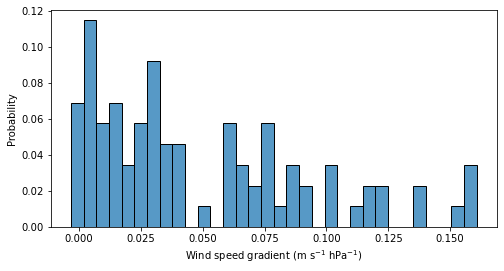

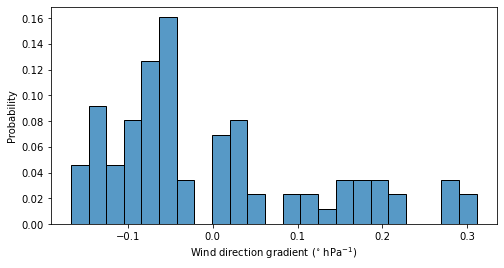

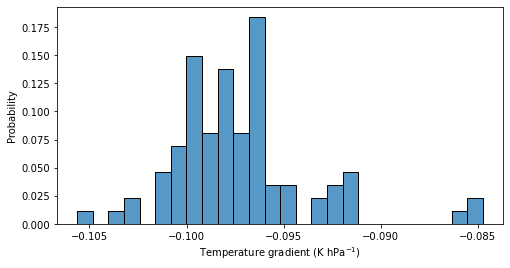

In [23]:
# WIND SPEED SHEAR
plt.figure(figsize=(8,4))
seaborn.histplot(cellsmeteo.wsshear,kde = False, bins = int(((cellsmeteo.wsshear).max()-(cellsmeteo.wsshear).min())/0.005), stat = "probability")
plt.xlabel('Wind speed gradient (m s$^{-1}$ hPa$^{-1}$)')
plt.savefig('/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tobac_tracking_statistics/tracks/vertical_tINIT_wind_speed_gradient_'+nwp+'.png',dpi=400,facecolor='white',transparent=False)

# WIND DIRECTION SHEAR
plt.figure(figsize=(8,4))
seaborn.histplot(cellsmeteo.wdshear,kde = False, bins = int(((cellsmeteo.wdshear).max()-(cellsmeteo.wdshear).min())/0.02), stat = "probability")
plt.xlabel('Wind direction gradient ($^{\circ}$ hPa$^{-1}$)')
plt.savefig('/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tobac_tracking_statistics/tracks/vertical_tINIT_wind_direction_gradient_'+nwp+'.png',dpi=400,facecolor='white',transparent=False)

# TEMPERATURE GRADIENT
plt.figure(figsize=(8,4))
seaborn.histplot(cellsmeteo.tgrad,kde = False, bins = int(((cellsmeteo.tgrad).max()-(cellsmeteo.tgrad).min())/0.0008), stat = "probability")
plt.xlabel('Temperature gradient (K hPa$^{-1}$)')
plt.savefig('/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tobac_tracking_statistics/tracks/vertical_tINIT_temperature_gradient_'+nwp+'.png',dpi=400,facecolor='white',transparent=False)
